In [2]:
!pip install osmnx

     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 10.3 MB 41.5 MB/s 
     |████████████████████████████████| 6.6 MB 42.8 MB/s 
     |████████████████████████████████| 62 kB 822 kB/s 
     |████████████████████████████████| 994 kB 39.2 MB/s 
     |████████████████████████████████| 994 kB 43.6 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompat

In [10]:
import geopy as gp
from geopy.geocoders import Nominatim
import networkx as nx
import osmnx as ox

In [16]:
# 대구광역시 북구 산격동 대학로 80

n = "대구광역시 북구 산격동 대학로 80"
app = Nominatim(user_agent='tutorial')
location = app.geocode('{n}'.format(n=n))

print(location)
print(location.latitude, location.longitude)


르네상스 스카이뷰 2, 80, 대학로, 산격3동, 산격동, 북구, 대구, 41544, 대한민국
35.891822 128.610749


In [19]:
point = location.latitude,location.longitude
G = ox.graph_from_point(point, network_type='drive', dist=1000)

Intersections: 371, G: 591, G2: 375


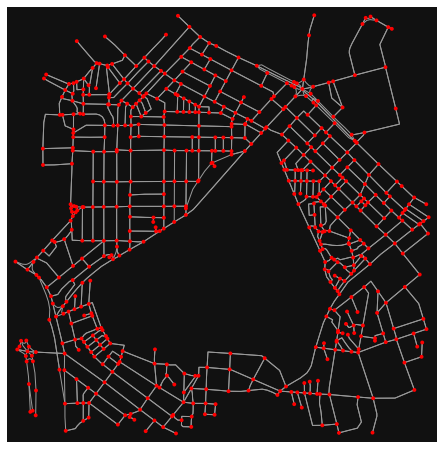

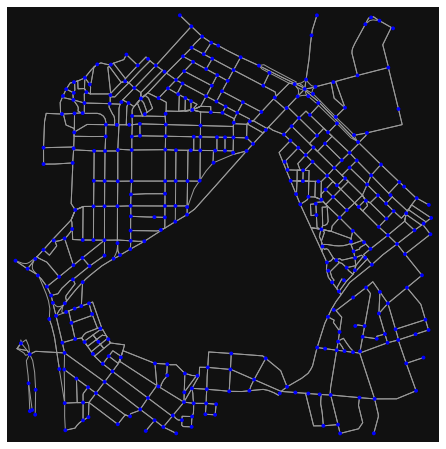

In [21]:
G_proj = ox.project_graph(G)
intersections = ox.consolidate_intersections(G_proj, rebuild_graph=False, tolerance=15, dead_ends=False)

G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
print("Intersections: {}, G: {}, G2: {}".format(len(intersections), len(G), len(G2)))

fig, ax = ox.plot_graph(G, node_color='r')
fig, ax = ox.plot_graph(G2, node_color='b')